# Asteroids plot
#### Yuri Shimane
2019.10.21
Revisiting problem from GTOC 4 - Asteroids Billiard
https://sophia.estec.esa.int/gtoc_portal/?page_id=23

In [54]:
import numpy as np
import pandas as pd
import spiceypy as spice
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation


In [2]:
# load spice kernels
spice.furnsh('../spice/naif0012.tls')

In [3]:
# import ephemerides data into pandas dataframe
elmnts = ['Name','Epoch','a','e','i','LAN','periap','theta']
df = pd.read_fwf('../gtoc4_problem_data.txt', sep='\t', skiprows=1)
num,tmp = df.shape
print(df.shape)
df.head(5)

(1436, 8)


,# Name,Epoch (MJD),a (AU),e,i (deg),LAN (deg),arg. periap. (deg),mean anomaly (deg)
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [32]:
# reassign column names
df.columns =  ['Name','Epoch','a','e','i','LAN','omega','M']
df.head(3)

,Name,Epoch,a,e,i,LAN,omega,M
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238


In [33]:
# define gravitational parameters
MU = 1.32712440018*10**11   # sun's gravitational parameter [km^3/s^2]
AU = 1.49597870691*10**8    # astronomical unit [AU] to [km]
g0 = 9.80665                # gravitational acceleration [m/s^2]

# compute state vector
sv = np.zeros((6,num))

# time to compute orbit position
JD = df.at[0,'Epoch'] + 2400000.5  # convert Modified Julian Date to Julian Date
strtime = str(JD) + ' JD'
print(strtime)
et = spice.str2et(strtime)         # convert Julian Date to ephemeris seconds
print(spice.et2utc(et,'C',1))

for i in range(num):    
    rp = df.at[i,'a'] * (1 - df.at[i,'e'])
    elts = [rp, df.at[i,'e'], np.rad2deg(df.at[i,'i']), np.rad2deg(df.at[i,'LAN']), np.rad2deg(df.at[i,'omega']), np.rad2deg(df.at[i,'M']), et, MU]
    tmp = spice.conics(elts,et)
    # store position
    sv[0,i] = tmp[0]  # x-position
    sv[1,i] = tmp[1]  # y-position
    sv[2,i] = tmp[2]  # z-position
    # store velocity
    sv[3,i] = tmp[3]  # x-velocity
    sv[4,i] = tmp[4]  # y-velocity
    sv[5,i] = tmp[5]  # z-velocity
    
sv.shape


2454800.5 JD
2008 NOV 30 00:00:00.0


(6, 1436)

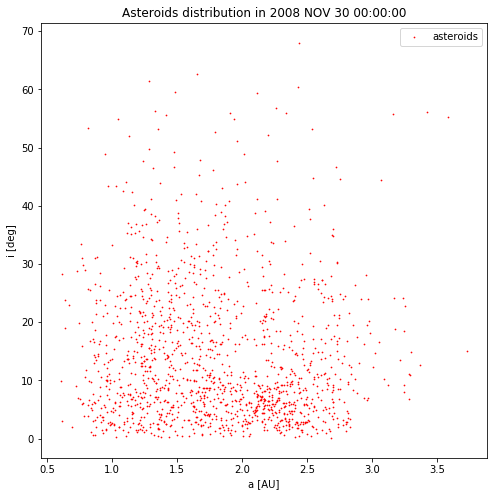

In [47]:
# plot statistical data of asteroids
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
x = np.zeros(num)
y = np.zeros(num)
for i in range(num):
    x[i] = df.at[i,'a']
    y[i] = df.at[i,'i']
    
plt.scatter(x, y, label='asteroids', c='r', s=0.5)
plt.title(f'Asteroids distribution in {spice.et2utc(et,"c",0)}')
plt.xlabel('a [AU]')
plt.ylabel('i [deg]')
plt.legend()
plt.show()

In [24]:
# Earth ephemeris
def Earth(param):
    """Function returns ephemeris value prompted, as defined by GTOC4 problem statement
    Args:
        param (str): orbital parameter to be fetched
            a: semi-major axis [AU]
            e: eccentricity
            i: inclination [deg]
            LAN: longitude of ascendig node [deg]
            omega: argument of periapsis [deg]
            M: mean anomaly [deg]
            t: Epoch at which these elements are defined [MJD]
    Returns:
        (float): value of prompted parameter
    """
    if param == 'a':
        retval = 0.999988049532578
    elif param == 'e':
        retval = 1.671681163160 / np.power(10,2)
    elif param == 'i':
        retval = 0.8854353079654 / np.power(10,3)
    elif param == 'LAN':
        retval = 175.40647696473
    elif param == 'omega':
        retval = 287.61577546182
    elif param == 'M':
        retval = 257.60683707535
    elif param == 't':
        retval = 54000
    else:
        print('function parameter is invalid')
        return None
    return retval


In [25]:
# compute Earth position
rp = Earth('a') * (1 - Earth('e'))
elts = [rp, Earth('e'), np.rad2deg(Earth('i')), np.rad2deg(Earth('LAN')), np.rad2deg(Earth('omega')), np.rad2deg(Earth('M')), et, MU]
Earth0 = spice.conics(elts,et)


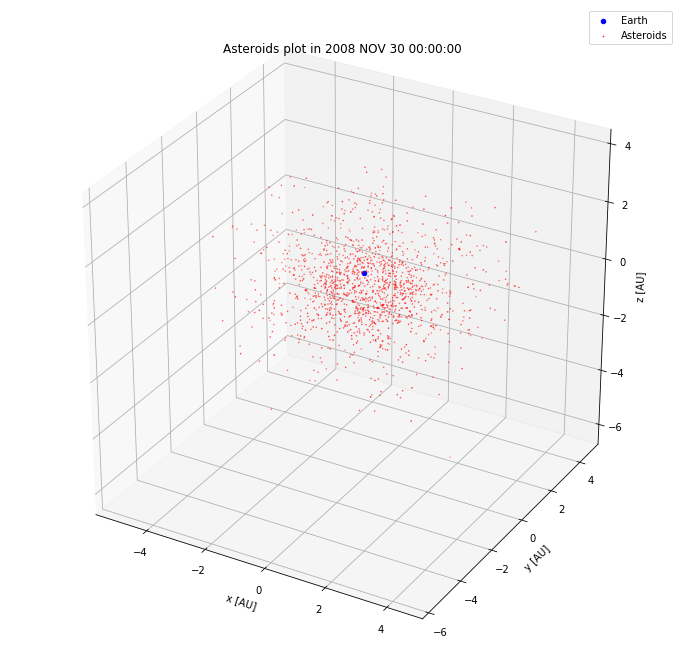

In [26]:
# plot asteroid positions
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Earth0[0],Earth0[1],Earth0[2], c='b', label='Earth')
ax.scatter(sv[0,:], sv[1,:], sv[2,:], c='r', s=0.3, label='Asteroids')

plt.title(f'Asteroids plot in {spice.et2utc(et,"c",0)}')
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')
ax.legend()
plt.show()


ET One: 473342467.18391585, ET Two: 1135944069.183874


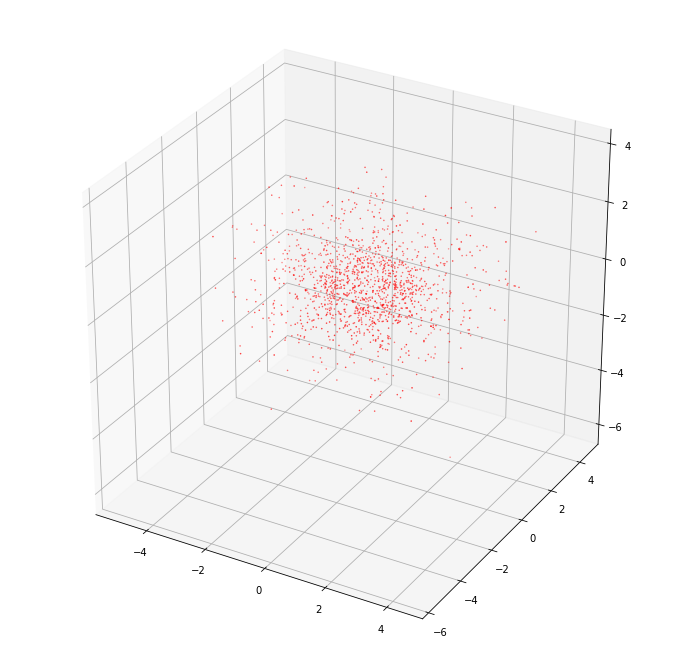

In [58]:
# propagate time over allowed time span
step = 100
# we are going to get positions between these two dates
utc = ['Jan 1, 2015','Dec 31, 2035']
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])
print("ET One: {}, ET Two: {}".format(etOne, etTwo))
# get times
etRange = [x*(etTwo-etOne)/step + etOne for x in range(step)]

# initialize plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

def animate(i):
    # loop over etRange
    for j in range(step):
        for i in range(num):
            # compute state vector
            rp = df.at[i,'a'] * (1 - df.at[i,'e'])
            elts = [rp, df.at[i,'e'], np.rad2deg(df.at[i,'i']), np.rad2deg(df.at[i,'LAN']), np.rad2deg(df.at[i,'omega']), np.rad2deg(df.at[i,'M']), et, MU]
            tmp = spice.conics(elts,et)
            # store position
            sv[0,i] = tmp[0]  # x-position
            sv[1,i] = tmp[1]  # y-position
            sv[2,i] = tmp[2]  # z-position
            # store velocity
            sv[3,i] = tmp[3]  # x-velocity
            sv[4,i] = tmp[4]  # y-velocity
            sv[5,i] = tmp[5]  # z-velocity
    
    ax.scatter(sv[0,:], sv[1,:], sv[2,:], c='r', s=0.3, label='Asteroids')
    
    #plt.pause(0.01)
    #plt.show()

ani = animation.FuncAnimation(fig,animate,interval=1000)
plt.show()

In [ ]:
# Tisserand's parameter
# https://en.wikipedia.org/wiki/Tisserand%27s_parameter